<a href="https://colab.research.google.com/github/pleunipennings/CSC508_ML_Biomedicine_Class/blob/main/Module7/Module_7a_Logistic_Regression_Antibiotic_resistance_dataset_CSC508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Welcome to the module 7a coding part: Logistic Regression!**

*This notebook was created at San Francisco State University (SFSU) for the Promoting INclusivity and Computing (PINC) and gSTAR programs by Dr. Pleuni Pennings (SFSU biology professor), Lucy Moctezuma Tan (California State University, East Bay CSUEB master student) and Lorena Benitez-Rivera (SFSU master student). All members of the COde to understand Drug resistance Evolution (CODE) lab in 2023.*

The code is based on a project by Faye Orcales, Jameel Ali, Meris Johnson-Hagler, Kristiene Recto, Lucy Moctezuma Tan (all CODE lab members at SFSU), and in turn inspired by work by Danesh Moradigaravand and coauthors [Moradivaravand et al.](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006258)

#OBJECTIVE OF THIS NOTEBOOK:

In this notebook we are going to continue using the dataframe we merged in notebook 6a: EColi_Merged_dfs.csv that has the antibiotic resistance features of:

*   **Year of isolation (Y)**
*   **Gene absence or presence (G)**
*   **Population Structure (S)**  

The main **goal** is to create a **logistic regression** model to predict **Resistance (R)** and **Susceptibility (S)** for each strain.

In this notebook you will learn:

- Familiarize with the basics of how logistic regression model works.
- Learn how to create functions to implement logistic Regression in our dataset.

#WHAT IS LOGISTIC REGRESSION?

**Logistic Regression** is a classification model that allows us to predict the probability for a binary outcome (2 classes). Typically it is expected that the threshold for logistic regression is 0.5. In our example, **0.5** means that **above** this probability, the model would predict **Resistant (R)** and **below** this it will predict **Susceptible (S)**.

The equation for Logistic Regression is actually derived from Linear Regression, but instead of Y (Response) we have a log of odds:

$$ ln(\frac{P}{1-P}) = \hat \beta_0 + \hat \beta_jX$$

After isolating P, we end up with the equation below:

$$P = \frac{e^{\hat{\beta}_{0}+\hat{\beta}_{j}X}}{1+e^{\hat{\beta}_{0}+\hat{\beta}_{j}X}}$$

- ***P*** is the probability of an outcome. Therefore **P** is a number between 0 (0%) and 1 (100%). Our threshold would be 50%, for our example:

  - If **P < 0.5** our model would predict **Susceptibility (S)**
  - If **P > 0.5** our model would predict **Resistance (R)**

- **$\hat \beta_0$** is the intercept term and $\hat \beta_j = [\beta_1 , \beta_2 , \beta_3, ... , \beta_{18293}]$ all these are the coefficients that our model will try to estimate using our data. There is one coefficient per column feature we are using making 18,293 of them in our example.

- $X = [Year \ of \ isolation \ (Y)\ + Gene \ absence \ and \ presence \ (G) + Population \ Structure \ (S) \ columns]$ is the matrix of features that is composed of the actual data.

We will see each of the parts of this equation as we go along in the notebook, so we can have a better picture of these.

More information about Logistic Regression can be found here: [Scikit-learn: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


## **Step 1) Importing packages**

The code below will allow you to import the packages needed to load and pre-process the data use for our models.

**NOTE:** Please allow access to your google drive when prompted, this will let you create and store the files in your drive to be accessed later by subsequent notebooks as we make progress towards getting our final results.

In [1]:
# Data manipulation imports for ML
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Import packages for logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# Imports for model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Imports for data visualization
import matplotlib.pyplot as plt

# Imports for file management
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Step 2) Loading CSV file and creating dataframes for each antibiotic**

Here we will be loading the CSV we created in the previous notebook 6a. This file should contain all out **antibiotic drugs** (labels), all the **years of isolation (Y)**, **gene absence/presence (G)** and the **population structure (S)** data (features).

#### **a) Loading CSV created from previous 6a notebook**

Please make sure that the dataframe you have loaded is correct with the corresponding column names appropiately matched with the data.

When we check our dataframe, we can see that there is a total of **1,936 rows** and **18,304 columns** (Isolate number + 12 drug columns + 18,291 columns of features)

In [2]:
# Loads csv file as a dataframe
filepath = '/content/drive/My Drive/EColi_ML_CSV_files/'

# reads csv file as a dataframe
All_Drugs_df = pd.read_csv(filepath+"EColi_Merged_dfs.csv", na_values="NaN")
All_Drugs_df

<ipython-input-2-c8b505bfe564>:5: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  All_Drugs_df = pd.read_csv(filepath+"EColi_Merged_dfs.csv", na_values="NaN")


,Isolate,CTZ,CTX,AMP,AMX,AMC,TZP,CXM,CET,GEN,...,cutoff_25459,cutoff_25654,cutoff_25772,cutoff_25979,cutoff_26792,cutoff_27119,cutoff_27236,cutoff_27248,cutoff_27690,cutoff_45092
0,11657_5#10,S,S,S,NaN,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
1,11657_5#11,S,S,R,NaN,R,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
2,11657_5#12,S,S,S,NaN,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
3,11657_5#13,S,S,R,NaN,R,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
4,11657_5#14,S,S,R,NaN,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,24742_1#96,S,S,S,NaN,NaN,NaN,S,S,S,...,0,0,0,0,0,0,0,0,0,0
1932,24742_1#97,S,S,S,NaN,NaN,NaN,S,S,S,...,0,0,0,0,0,0,0,0,0,0
1933,24742_1#98,S,S,R,NaN,NaN,NaN,S,S,S,...,0,0,0,0,0,0,0,0,0,0
1934,24742_1#99,S,S,R,NaN,NaN,NaN,S,S,S,...,0,0,0,0,0,0,0,0,0,0


#### **b) Creating dataframes for each drug**
If everything looks good in part a, we can now concentrate on isolating each antibiotic with it's predictor. The objective of this part will be to create a single dataframe for each antibiotic drug. This means that we want all our features being used to predict the label for only one drug.

This is because expressions of **Resistance (R)** or **Susceptibility (S)** are not universal. For example, just because a sample *E. coli* is resistant to say AMP (Ampicilin), it doesn't mean that is resistant to AMX (Amoxicilin).

- As a review let's look at the list of antibiotic drugs we will be working with on the code below. Each of these drugs will be matched with all the features (years of isolation, gene absence and presence, and population structure) we are interested in using.

In [3]:
# creating a list of antibiotic names
drug_list = All_Drugs_df.iloc[:,1:13].columns
drug_list

Index(['CTZ', 'CTX', 'AMP', 'AMX', 'AMC', 'TZP', 'CXM', 'CET', 'GEN', 'TBM',
       'TMP', 'CIP'],
      dtype='object')

- Now in the code below we will be creating a general function that will help us do the task of match a particular drug with all the features. In addition it will eliminate missing data in features for that particular drug. Creating this function will help us not have to repeat this chunk of code for every drug. Instead we can just call the function.

In [4]:
# creating a function that makes dataframes for each antibiotic and dropping NaN values
def makeDF(drug):
  df_list = [All_Drugs_df[["Isolate",drug]],All_Drugs_df.iloc[:,13:]]
  Drug_df = pd.concat(df_list, axis=1)
  Drug_df = Drug_df.dropna()
  return Drug_df

- The code below will show an example on how our function **makeDF()** works. All we have to do is to put the drug of interest in the parenthesis and it will inmediately execute the chunk of code we wrote before. In the example below, it will match the CTZ drug label column with the rest of the features and it will eliminate the rows that contain a missing feature value.
- The **output** of this function will be the dataframe of the antibiotic drug we specified. The output is the dataframe called **CTZ_df**

In [5]:
# implementing function using as example the drug CTZ
CTZ_df = makeDF("CTZ")

# looking at the shape of CTZ dataframe
print("CTZ dataframe shape: ", CTZ_df.shape)

# looking at the first 5 rows of this dataframe
CTZ_df.head()

CTZ dataframe shape:  (1935, 18293)


,Isolate,CTZ,Year_1970.0,Year_1977.0,Year_1994.0,Year_1997.0,Year_1998.0,Year_1999.0,Year_2001.0,Year_2002.0,...,cutoff_25459,cutoff_25654,cutoff_25772,cutoff_25979,cutoff_26792,cutoff_27119,cutoff_27236,cutoff_27248,cutoff_27690,cutoff_45092
0,11657_5#10,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11657_5#11,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11657_5#12,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11657_5#13,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11657_5#14,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- As you can see our original data had 12 antibiotic drug columns, but now it only contains the drug CTZ column.
- In addition notice that our initial dataframe had 1936 rows but the new one only has **1935 rows**. This means that only one row was eliminated due to the presence of missing values. We now have **18,293 columns**( Isolate number + CTZ label column  + all 18291 feature columns = 18293)**

**NOTE:** Notice that the code above is just demonstrating how the function works, but our ultimate objective is to use it later for each of our antibiotic drugs to create a total of 12 dataframes each with its respective drug.


## **Step 3) Separating each drug dataframe into 4 sections : Training (features and labels) and Testing (features and labels)**

#### **a) Creating testing and training datasets for each antibiotic drug**

Next in our process we will need to split each of our 12 antibiotic dataframes into 4 different sections:

**TRAINING**

**a) labels_train:** are the labels **Resistant (R)** and **Susceptible (S)** for a single antibiotic drug that will be used to teach our model how to make predictions.

**b) features_train:** are the features that will be used along with the labels_train to teach our model to make predictions. Note that feature_train is actually the X matrix in our logistic equation! They will be used to estimate our $\beta_0$ and all the $\beta_j$ values with a process called *Maximum Likelyhood*. You can watch the mathematical details of how this is done by watching this [video](https://www.youtube.com/watch?v=BfKanl1aSG0) by Josh Starmer.

**TESTING**

**c) labels_test:** are the labels we will holding out so that we can see at the end if we made accurate predictions.

**d) features_test:** are the X values we will plug into our model, once $\beta_0$ and all the $\beta_j$ values have already been estimated.

- Below we create a function that will be used to separate each of our 12 antibiotic dataframes into the 4 separate parts described above.

Specifically we also specified that **33%** of our data to be used as a **testing set** and thus **67%** of our data remains to become our **training set**. You can choose a different percentage to split them just know that the majority of our data should be used for training, other splits people try are 30/70 or 20/80 for testing/training respectively.

- In addition, the function will save each of these 4 parts into a python dictionary object. If you are unfamiliar with what a dictionary is in python, feel free to check out this useful [link](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). This way we can organize and access our 4 data chunks for a specific antibiotic drug.

In [6]:
# Separating each dataframe into labels and features for training and testing data
def Split_train_test(Drug_df,drug):
  Train_test_dic = {}
  labels = Drug_df[drug]
  features = Drug_df.drop(columns=[drug])
  features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42)

  Train_test_dic['labels_train'] = labels_train
  Train_test_dic['features_train'] = features_train
  Train_test_dic['labels_test'] = labels_test
  Train_test_dic['features_test'] = features_test

  return Train_test_dic

- To demonstrate how our function works, we will test it using the previous CTZ dataframe we created already in step 2, called **CTZ_df**. Our function **Split_train_test()** will accept 2 arguments, the first is the dataframe, the second is the drug name.

- The **output** of the function below is a data dictionary of the specific drug dataframe we asked it to split into 4 chunks. In this case we have used **CTZ_df** to create the data dictionary called **CTZ_Train_test_dic**

## **Task 1:**
- Use the function created above to create a data split for a drug of your choice.
- Check the shape for each the dataframes in the dictionary

In [ ]:
# Input your code for task 1 in this cell!

In [ ]:
CTZ,
CTZ_df

In [7]:
CTZ_df.head()

,Isolate,CTZ,Year_1970.0,Year_1977.0,Year_1994.0,Year_1997.0,Year_1998.0,Year_1999.0,Year_2001.0,Year_2002.0,...,cutoff_25459,cutoff_25654,cutoff_25772,cutoff_25979,cutoff_26792,cutoff_27119,cutoff_27236,cutoff_27248,cutoff_27690,cutoff_45092
0,11657_5#10,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11657_5#11,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11657_5#12,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11657_5#13,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11657_5#14,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Task 1 answer:**

In [38]:
CTZ_Train_test_dic = Split_train_test(CTZ_df,"CTZ")
print("Shape of labels_train dataframe: ",CTZ_Train_test_dic['labels_train'].shape)
print("Shape of features_train dataframe: ",CTZ_Train_test_dic['features_train'].shape)
print("Shape of labels_test dataframe: ",CTZ_Train_test_dic['labels_test'].shape)
print("Shape of features_test dataframe: ",CTZ_Train_test_dic['features_test'].shape)


Shape of labels_train dataframe:  (1296,)
Shape of features_train dataframe:  (1296, 18292)
Shape of labels_test dataframe:  (639,)
Shape of features_test dataframe:  (639, 18292)


## **Step 4) Creating different combination of features before training**

Below we create a function that will take the features dataframe (train or test) from the dictionary we have created in step 3 and then will create different feature combinations dataframe. For instance, a **"GY"** combination implies that we would like to use the **gene absence and presence (G)** feature columns and the **years of isolation (Y)** columns.

Reference for the combinations

- **Year of isolation (Y)**
- **Genes absence or presence (G)**
- **Population Structure (S)**



In [9]:
# making a list of combinations of data sources we would like to test in our ML models
combo_list = ['G', 'S', 'GY','GS' ,'SY', 'GYS' ]

In [10]:
# making a function that creates different feature combinations of the predictor features
def combo_feat(features_df, drug, combo):

  # creating Year column filters for features_df
  year_filter = [col for col in features_df if col.startswith("Year")]
  year_feat = features_df[year_filter]

  # creating Population structure column filters for features_df
  pop_str_filter = [col for col in features_df if col.startswith("cutoff")]
  pop_struc_feat = features_df[pop_str_filter]

  # creating Gene precence column filters for features_df
  gene_presc_filter = [col for col in features_df.columns if col not in pop_str_filter and col not in year_filter and col != "Isolate"]
  gene_presc_feat = features_df[gene_presc_filter]

  if combo == 'G':
    df_list = [features_df['Isolate'], gene_presc_feat]
    G_feat_df = pd.concat(df_list, axis=1)
    G_feat_df = G_feat_df.drop(columns=['Isolate'])
    return G_feat_df

  if combo == 'S':
    df_list = [features_df['Isolate'], pop_struc_feat]
    S_feat_df = pd.concat(df_list, axis=1)
    S_feat_df = S_feat_df.drop(columns=['Isolate'])
    return S_feat_df

  if combo == 'GY':
    df_list = [features_df['Isolate'], gene_presc_feat, year_feat]
    GY_feat_df = pd.concat(df_list, axis=1)
    GY_feat_df = GY_feat_df.drop(columns=['Isolate'])
    return GY_feat_df

  if combo== "GS":
    df_list = [features_df['Isolate'], gene_presc_feat, pop_struc_feat]
    GS_feat_df = pd.concat(df_list, axis=1)
    GS_feat_df = GS_feat_df.drop(columns=['Isolate'])
    return GS_feat_df

  if combo == 'SY':
    df_list = [features_df['Isolate'], pop_struc_feat, year_feat]
    SY_feat_df = pd.concat(df_list, axis=1)
    SY_feat_df = SY_feat_df.drop(columns=['Isolate'])
    return SY_feat_df

  if combo == 'GYS':
    df_list = [features_df['Isolate'], gene_presc_feat, year_feat, pop_struc_feat, ]
    GYS_feat_df = pd.concat(df_list, axis=1)
    GYS_feat_df = GYS_feat_df.drop(columns=['Isolate'])
    return GYS_feat_df


## **Task 2:**

- Use the function above and try implementing its function, using the dataframe you created in the prior step.

In [ ]:
# Input your code for task 2 in this cell!

In [29]:
G_feat_df = combo_feat(CTZ_Train_test_dic['features_train'],"CTZ", 'G')
S_feat_df = combo_feat(CTZ_Train_test_dic['features_train'],"CTZ", 'S')
GY_feat_df = combo_feat(CTZ_Train_test_dic['features_train'],"CTZ", 'GY')
GS_feat_df = combo_feat(CTZ_Train_test_dic['features_train'],"CTZ", 'GS')
SY_feat_df = combo_feat(CTZ_Train_test_dic['features_train'],"CTZ", 'SY')
GYS_feat_df = combo_feat(CTZ_Train_test_dic['features_train'],"CTZ", 'GYS')


In [40]:
G_feat_df.head()

,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,galM,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
747,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
819,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
860,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1053,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1600,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


**Task 2 answer:**

## **Step 5) Creating Logistic Regression model and training it per feature combination**
The next step involves finally creating a function that will actually make our Logistic Regression model and fit our desired training features combination. We will realize that although this function seems fairly straight forward, there is a lot of calculations happening. We will only take a small peak at what's going on in the background.

In [13]:
# creating Logistic regression model function
@ignore_warnings(category=ConvergenceWarning)
def run_LG(feat_train_df, lab_train, drug, combo):
  print(drug +" Training combo: "+ combo)
  LG = LogisticRegression(random_state = 42, solver= 'lbfgs', C=1.0, max_iter=500)
  LG = LG.fit(feat_train_df, lab_train)
  return LG

## **Task 3:**
- Use the function above and try implementing its function, using the data training data from the previous step.

In [ ]:
# Input your code for task 3 in this cell!

In [41]:
G_model = run_LG(G_feat_df, CTZ_Train_test_dic['labels_train'], "CTZ", 'G')
S_model = run_LG(S_feat_df, CTZ_Train_test_dic['labels_train'], "CTZ", 'S')
GY_model = run_LG(GY_feat_df, CTZ_Train_test_dic['labels_train'], "CTZ", 'GY')
GS_model = run_LG(GS_feat_df, CTZ_Train_test_dic['labels_train'], "CTZ", 'GS')
SY_model = run_LG(SY_feat_df, CTZ_Train_test_dic['labels_train'], "CTZ", 'SY')
GYS_model = run_LG(GYS_feat_df, CTZ_Train_test_dic['labels_train'], "CTZ", 'GYS')


CTZ Training combo: G
CTZ Training combo: S
CTZ Training combo: GY
CTZ Training combo: GS
CTZ Training combo: SY
CTZ Training combo: GYS


**Task 3 answer:**

In the code below we can now actually observe what were the $\beta$ values estimated for our model. First we can check that our intercept or $\beta_0$ is aproximately $1.89 * 10^{-4}$

In [42]:
# printing the beta_0 or intercept value of our model
print("Intercept:",LG_CTZ_GYS_model.intercept_[0])

Intercept: -0.0038857877520806637


In [33]:
print("Intercept:", G_model.intercept_[0])
print("Intercept:", S_model.intercept_[0])
print("Intercept:", GY_model.intercept_[0])
print("Intercept:", GS_model.intercept_[0])
print("Intercept:", SY_model.intercept_[0])
print("Intercept:", GYS_model.intercept_[0])


Intercept: -0.0038857877520806637
Intercept: 0.0001733448499179561
Intercept: -0.0034897921732763887
Intercept: 0.00015173517715147866
Intercept: 0.00013789212970385302
Intercept: 0.00013519426238687302


In [18]:
LG_CTZ_GYS_model, LG_CTZ_G_model, LG_CTZ_S_model, LG_CTZ_GS_model, LG_CTZ_SY_model, LG_CTZ_GY_model = [run_LG(combo_feat(CTZ_Train_test_dic['features_train'],"CTZ",combo), CTZ_Train_test_dic['labels_train'], "CTZ", combo) for combo in combo_list]


CTZ Training combo: G
CTZ Training combo: S
CTZ Training combo: GY
CTZ Training combo: GS
CTZ Training combo: SY
CTZ Training combo: GYS


Then we can check all the $\beta_j$ values, recall there is for this model (GYS) a total of 18,291 feature columns used thus, there should be the same value of $\beta_j$ values.

**NOTE:** the computer has it's limitations when it comes to representing really small values so for instance the last $\beta_j$ value looks like 5.56440932e-05 . But this essentially means $5.56440932 * 10^{-5}$ which is aproximately $5.56 * 10^{-5}$

In [34]:
# printing all the beta_j's or coefficients of our logistic regression model
print("All beta_j values:", LG_CTZ_GYS_model.coef_[0])

# printing the number of all the beta_j values
print("Number of beta_j values: ", len(LG_CTZ_GYS_model.coef_[0]))

All beta_j values: [-0.00080764 -0.00472582 -0.00958224 ...  0.00063407  0.03701778
  0.00103225]
Number of beta_j values:  17198


Now that we have these values estimated ($\beta_0$ and all the $\beta_j$ values ) we have essentially the following equation as the actual model:

$$ ln(\frac{P}{1-P}) = (1.89 * 10^{-4}) + (1.89 * 10^{-4})feat_1 + (1.84 * 10^{-4})feat_2 + ... + (5.56∗10^{−5})feat_{18291}$$

- *feat* = features


## **Step 6) Making predictions from Logistic Regression model**
Now that our model has been trained and all $\beta$ values have been estimated, we are actually ready to make predictions using the testing features chunk we have already separated when we made our antibiotic drug dictionary.

Below we create another function where we predict labels using the actual model and the "features_test" chunk.

In [20]:
# creating a function using the model created and trained and the feature combinations from testing data
def predict(LG_combo_Model, features_test):
  labels_pred = LG_combo_Model.predict(features_test)
  return labels_pred

## **Step 7) Evaluating our model using a confusion matrix**

Below we create our last function **evaluate**, where we are able to extract our **accuracy**, and **recall** for **Resistant (R)** and **Susceptible (S)** *E.coli*. We also create a Confusion Matrix.

Notice that within the function, we had to convert the labels test into numbers as well in order to be able to be compared with our predicted labels.

In [21]:
# Creating a function that evaluates our model using our actual and predicted data
def evaluate(LG_combo_model, labels_test, labels_pred, cf= True):
  report = classification_report(labels_test, labels_pred, output_dict = True)
  accuracy = report['accuracy']
  R_recall = report['R']['recall']# Resistant
  S_recall = report['S']['recall']# Susceptible
  if cf == True:
    cm = confusion_matrix(labels_test, labels_pred, labels=LG_combo_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LG_combo_model.classes_)
    disp.plot()
    plt.show()
  return [accuracy,R_recall,S_recall]

## **Task 4:**
- Using prior functions created, and model created and trained, make predictions and finally evaluate your model.

- If your results could be better, try tunning some of the hyperparameters for Logistic Regression to improve your score.


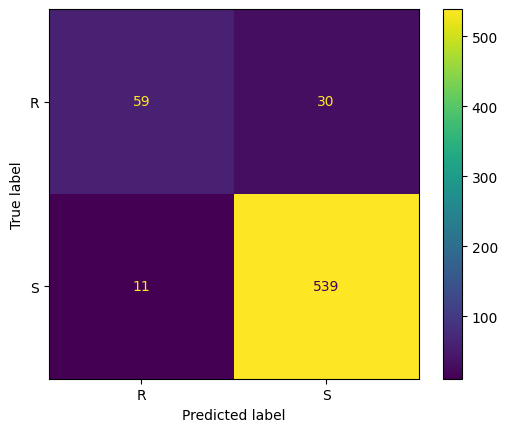

G Accuracy: [0.9358372456964006, 0.6629213483146067, 0.98]


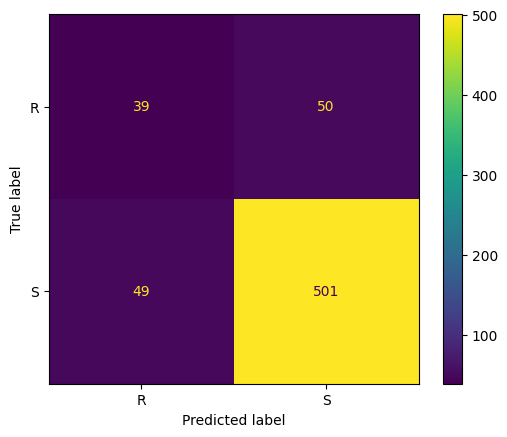

S Accuracy: [0.8450704225352113, 0.43820224719101125, 0.9109090909090909]


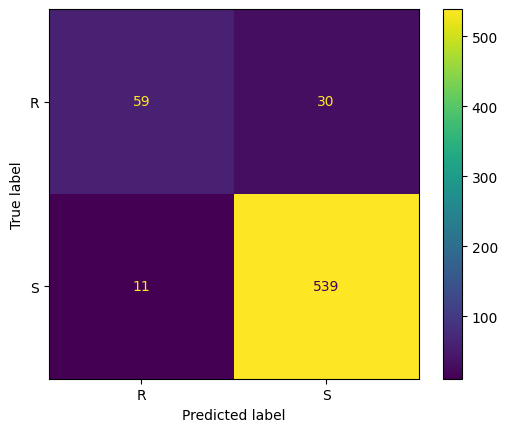

GY Accuracy: [0.9358372456964006, 0.6629213483146067, 0.98]


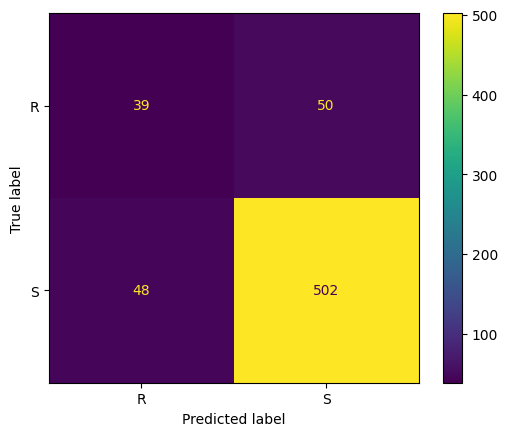

GS Accuracy: [0.8466353677621283, 0.43820224719101125, 0.9127272727272727]


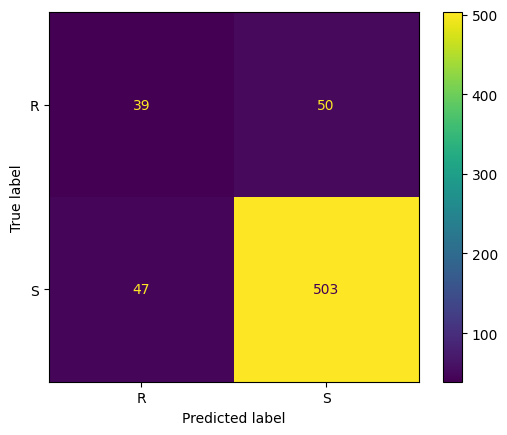

SY Accuracy: [0.8482003129890454, 0.43820224719101125, 0.9145454545454546]


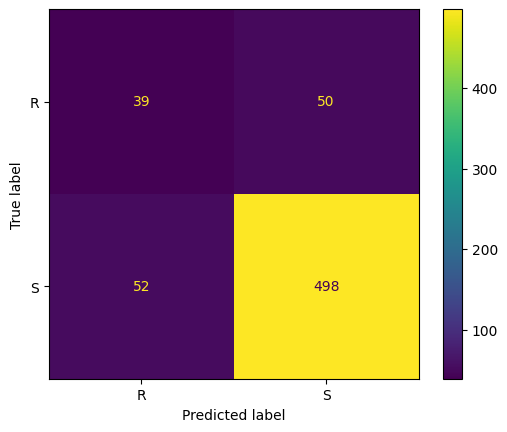

GYS Accuracy: [0.8403755868544601, 0.43820224719101125, 0.9054545454545454]


In [54]:
G_labels_pred = predict(G_model, combo_feat(CTZ_Train_test_dic['features_test'],"CTZ", 'G'))
S_labels_pred = predict(S_model, combo_feat(CTZ_Train_test_dic['features_test'],"CTZ", 'S'))
GY_labels_pred = predict(GY_model, combo_feat(CTZ_Train_test_dic['features_test'],"CTZ", 'GY'))
GS_labels_pred = predict(GS_model, combo_feat(CTZ_Train_test_dic['features_test'],"CTZ", 'GS'))
SY_labels_pred = predict(SY_model, combo_feat(CTZ_Train_test_dic['features_test'],"CTZ", 'SY'))
GYS_labels_pred = predict(GYS_model, combo_feat(CTZ_Train_test_dic['features_test'],"CTZ", 'GYS'))

print("G Accuracy:", evaluate(G_model, CTZ_Train_test_dic['labels_test'], G_labels_pred))
print("S Accuracy:", evaluate(S_model, CTZ_Train_test_dic['labels_test'], S_labels_pred))
print("GY Accuracy:", evaluate(GY_model, CTZ_Train_test_dic['labels_test'], GY_labels_pred))
print("GS Accuracy:", evaluate(GS_model, CTZ_Train_test_dic['labels_test'], GS_labels_pred))
print("SY Accuracy:", evaluate(SY_model, CTZ_Train_test_dic['labels_test'], SY_labels_pred))
print("GYS Accuracy:", evaluate(GYS_model, CTZ_Train_test_dic['labels_test'], GYS_labels_pred))


## **Step 8) Use all functions and evaluate every drug in every feature combination!**

#### **a) Creating a loop with all possible drugs and feature combinations**

Below is how we chose to chain these functions in order to get all our results and store them in a dictionary called **LG_model_metrics**. Note that this will take a long time as it is training for each drug every combination of features we have specified.  You can check the print out to see what model it's currently training.

**NOTE:** If the waiting time is too long for you, feel free to focus on fewer of the drugs and fewer of the combinations. For example, you could loop over part of the drug_list (for drug in drug_list[:3])

In [49]:
# Lets use all our functions this time and save our report into a single data structure
LG_model_metrics = {}

for drug in drug_list:
  print(drug)
  Drug_df = makeDF(drug) # creates one df per drug
  Test_Train_dic = Split_train_test(Drug_df, drug) # splits each drug df into a dictionary with testing and training data
  for combo in combo_list:
    # Training each drug_combo features
    labels_train = Test_Train_dic["labels_train"]
    features_train = combo_feat(Test_Train_dic["features_train"], drug, combo) # create corresponding feature_df for training
    LG_combo_model = run_LG(features_train, labels_train, drug, combo) # runs logistic regression model using the corresponding training feature_df

    # Predicting each drug_combo features
    features_test = combo_feat(Test_Train_dic["features_test"], drug, combo) # create corresponding feature_df for testing
    labels_pred = predict(LG_combo_model, features_test) # generate predictions based on the feature combination tested

    # Evaluating our models
    labels_test = Test_Train_dic["labels_test"]
    report = evaluate(LG_combo_model, labels_test, labels_pred, cf=False)
    LG_model_metrics[drug+"_"+combo] = report

    print(report)

CTZ
CTZ Training combo: G
[0.9358372456964006, 0.6629213483146067, 0.98]
CTZ Training combo: S
[0.8450704225352113, 0.43820224719101125, 0.9109090909090909]
CTZ Training combo: GY
[0.9358372456964006, 0.6629213483146067, 0.98]
CTZ Training combo: GS
[0.8466353677621283, 0.43820224719101125, 0.9127272727272727]
CTZ Training combo: SY
[0.8482003129890454, 0.43820224719101125, 0.9145454545454546]
CTZ Training combo: GYS
[0.8403755868544601, 0.43820224719101125, 0.9054545454545454]
CTX
CTX Training combo: G
[0.9641693811074918, 0.8442622950819673, 0.9939024390243902]
CTX Training combo: S
[0.8289902280130294, 0.6721311475409836, 0.8678861788617886]
CTX Training combo: GY
[0.9690553745928339, 0.8688524590163934, 0.9939024390243902]
CTX Training combo: GS
[0.8306188925081434, 0.6967213114754098, 0.8638211382113821]
CTX Training combo: SY
[0.8306188925081434, 0.6967213114754098, 0.8638211382113821]
CTX Training combo: GYS
[0.8371335504885994, 0.6967213114754098, 0.8719512195121951]
AMP
AMP Tr

#### **b) Store the metrics report for all drugs and features combinations as a csv file**

In [61]:
# convert dictionary into a dataframe
LG_metrics = pd.DataFrame.from_dict(LG_model_metrics, orient='index',columns=["Accuracy", "R_recall", "S_recall"]).reset_index()
LG_metrics = LG_metrics.rename(columns = {'index':'Drug_combo'})

# saving our metric results into a CSV file
LG_metrics.to_csv(filepath+"LG_metrics_df.csv", index= False)
LG_metrics


,Drug_combo,Accuracy,R_recall,S_recall
0,CTZ_G,0.935837,0.662921,0.980000
1,CTZ_S,0.845070,0.438202,0.910909
2,CTZ_GY,0.935837,0.662921,0.980000
3,CTZ_GS,0.846635,0.438202,0.912727
4,CTZ_SY,0.848200,0.438202,0.914545
...,...,...,...,...
67,CIP_S,0.854460,0.753425,0.884381
68,CIP_GY,0.949922,0.842466,0.981744
69,CIP_GS,0.849765,0.746575,0.880325
70,CIP_SY,0.841941,0.753425,0.868154


## **Task 5:**
- Create a bar chart showcasing all the results from the Logistic Regression model, after tunning your model.

- What do you think about the performance of your Logistic Regression model in comparison to all the models you have created before?

In [ ]:
# Input your code for task 5 in this cell!

**Task 5 answer:**

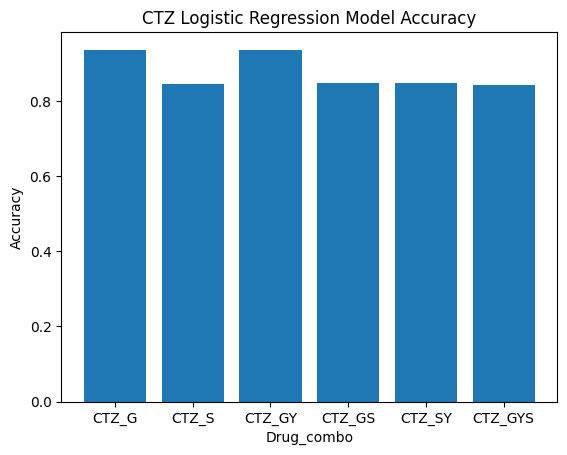

Accuracy:  0.8753260302556077


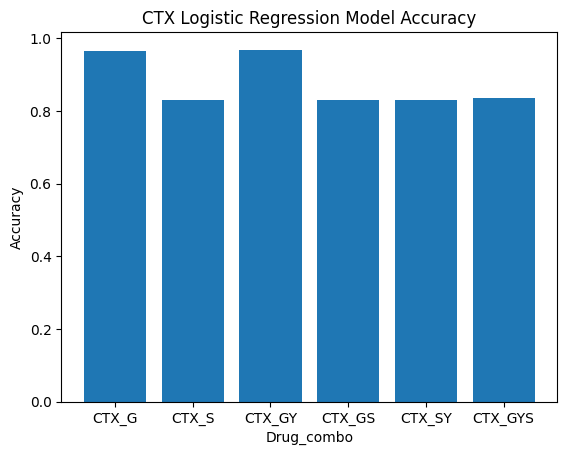

Accuracy:  0.8767643865363736


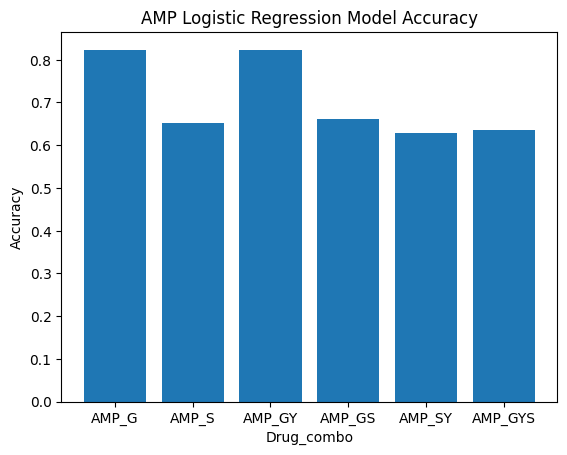

Accuracy:  0.7044364508393285


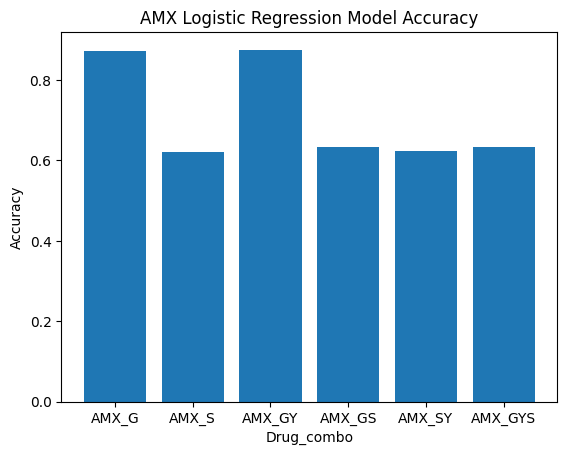

Accuracy:  0.7099447513812155


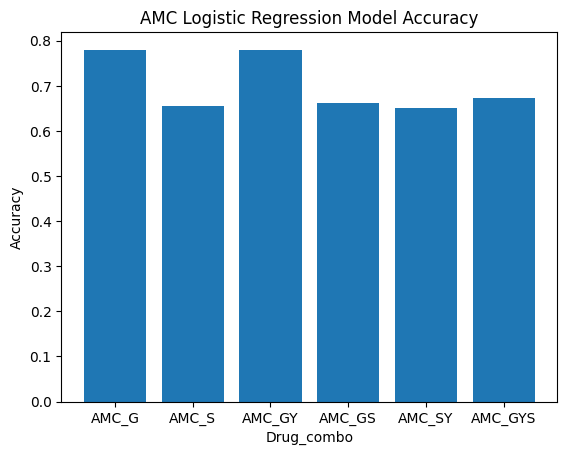

Accuracy:  0.6996996996996997


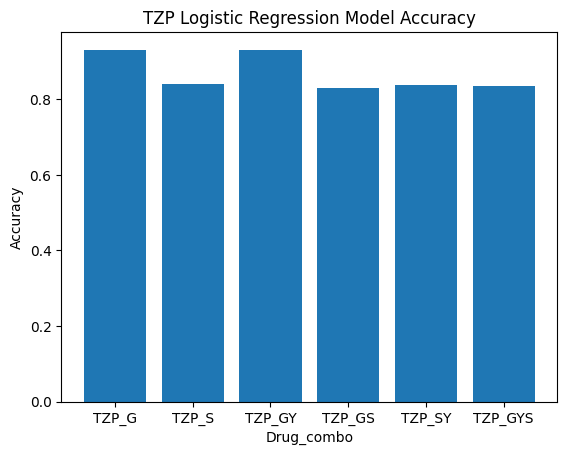

Accuracy:  0.8676293622141998


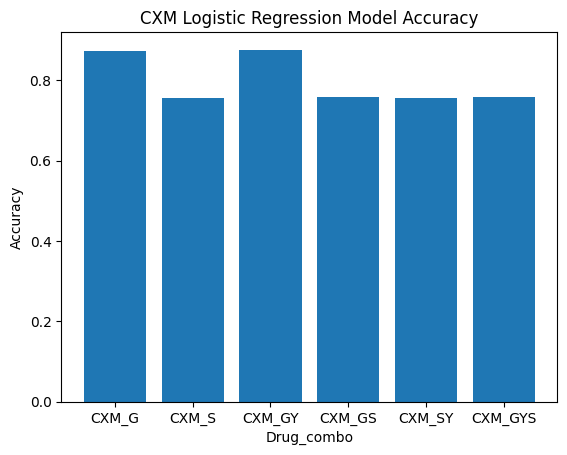

Accuracy:  0.7962962962962962


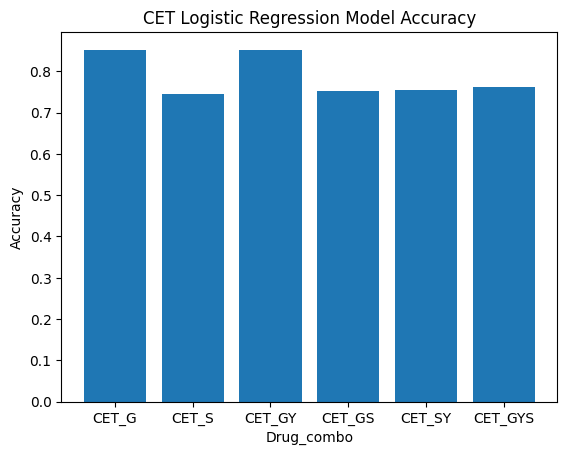

Accuracy:  0.7865707434052758


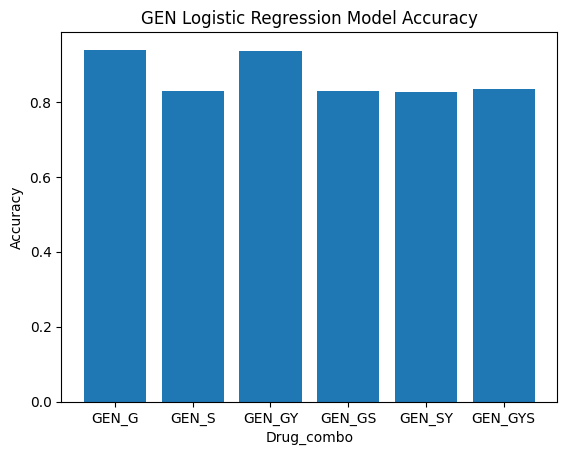

Accuracy:  0.8651538862806468


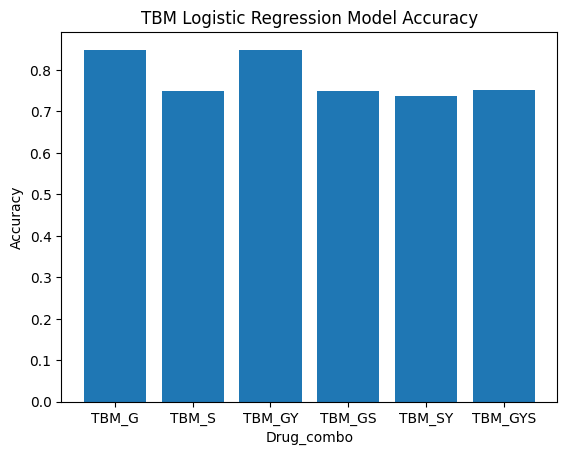

Accuracy:  0.7805755395683452


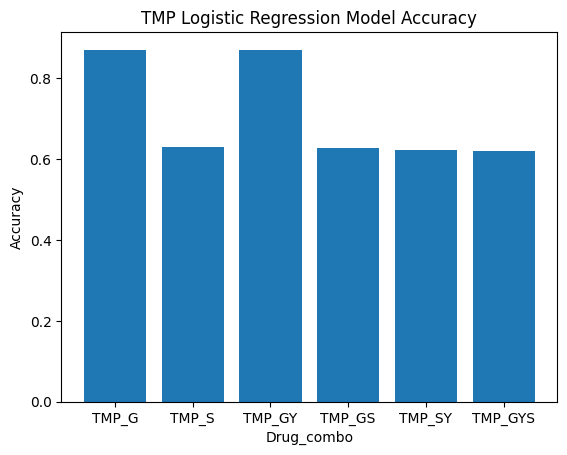

Accuracy:  0.7062350119904077


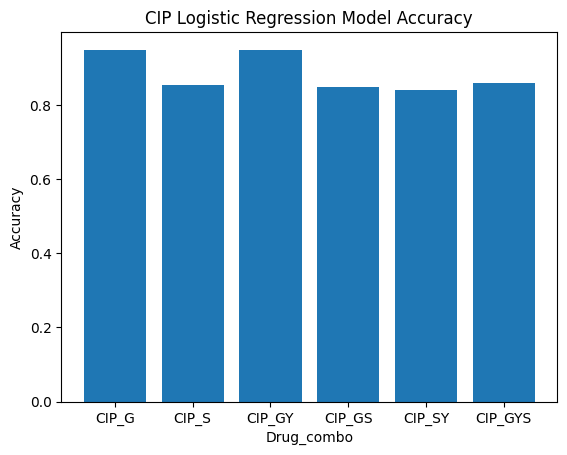

Accuracy:  0.8841940532081378
Logistic Regression Model Accuracy: 0.7960688509729612


In [60]:
# Creating a separate bar chart for each drug
for drug in drug_list:
  drug_df = LG_metrics[LG_metrics['Drug_combo'].str.contains(drug)]
  plt.bar(drug_df['Drug_combo'], drug_df['Accuracy'])
  plt.xlabel('Drug_combo')
  plt.ylabel('Accuracy')
  plt.title(drug+' Logistic Regression Model Accuracy')
  plt.show()
  print('Accuracy: ', drug_df['Accuracy'].mean())

print("Logistic Regression Model Accuracy:", LG_metrics['Accuracy'].mean())


# 🙂 Woohoo, you finished working on a complex project using three different machine learning models (gradient boosted tree, random forest and logistic regression) ! You are almost done with all the modules, we hope you feel proud of all the knownledge you had acquired.

In [ ]:
test